Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8699 - loss: 0.4535 - val_accuracy: 0.9620 - val_loss: 0.1243
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9659 - loss: 0.1121 - val_accuracy: 0.9722 - val_loss: 0.0945
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9777 - loss: 0.0739 - val_accuracy: 0.9740 - val_loss: 0.0845
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9838 - loss: 0.0515 - val_accuracy: 0.9760 - val_loss: 0.0836
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9869 - loss: 0.0410 - val_accuracy: 0.9790 - val_loss: 0.0748
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9751 - loss: 0.0924

Test accuracy: 0.9777
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


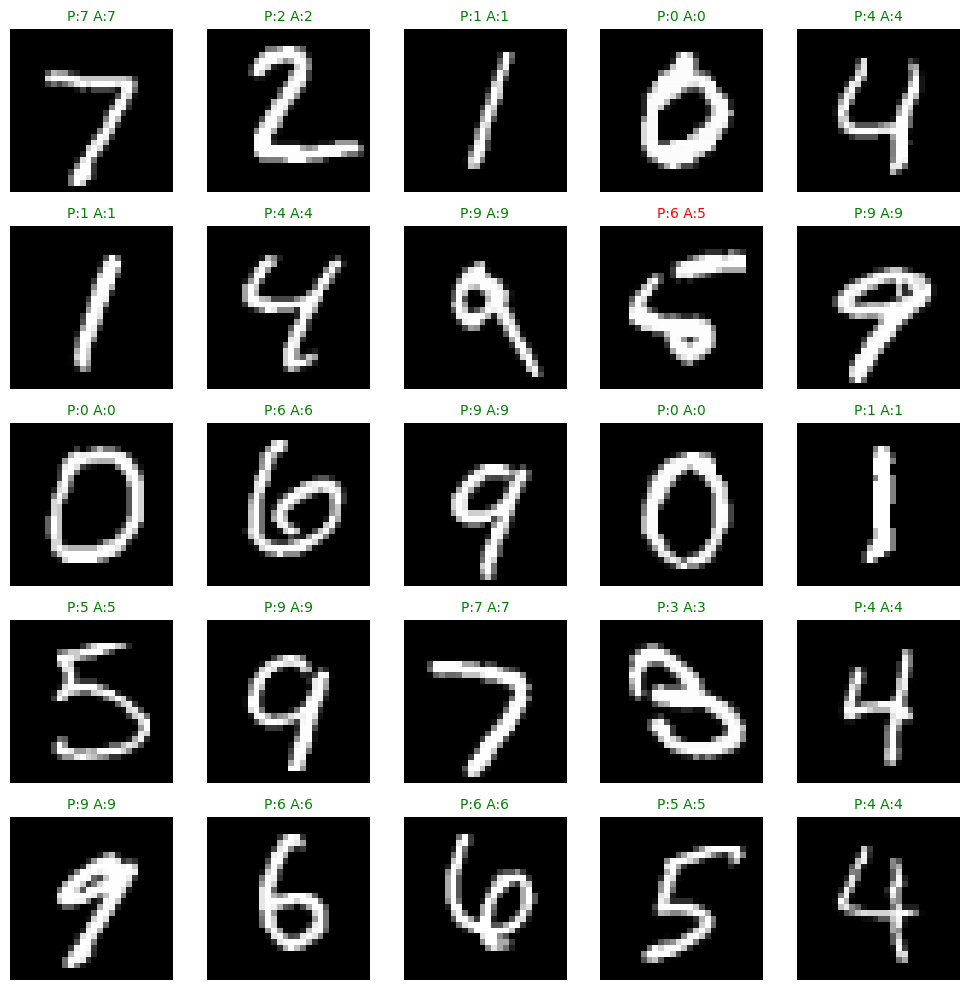

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data 
x_train = x_train / 255.0
x_test = x_test / 255.0


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),     
    Dense(128, activation='relu'),     
    Dense(64, activation='relu'),      
    Dense(10, activation='linear')    
])

# Compile 
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train 
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate 
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc:.4f}')

import matplotlib.pyplot as plt
import numpy as np

# Predict 

logits = model.predict(x_test[:25])
predictions = tf.nn.softmax(logits)
# Set up the grid: 5x5
rows, cols = 5, 5
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    
    pred_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    
    # Color the title: green if correct, red if wrong
    color = 'green' if pred_label == true_label else 'red'
    
    plt.title(f"P:{pred_label} A:{true_label}", color=color, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()
